In [2]:
import pandas as pd

#Avoid having displayed truncated outputs (The ...s in the dataframes)
pd.options.display.max_columns = 100

#Read CSV files into Pandas as Dataframes
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

#Grab all Fandango columns and movies rated on Fandango recently.
fandango_before = before[['FILM', 'Fandango_Stars','Fandango_Ratingvalue',
                 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

In [3]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


It's important that our samples are representative of the population otherwise we may end up with large sampling errors, and ultimately wrong conclusions. 

The criteria Hickie followed in his samples:
- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The conditions we have for our 2016-2017 Fandango sample:
- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews 

The Dataset was not random because not every had the same chance to be included in the same and some did not get a chance to be included in the sample at all (like those having 30 fan ratings or those that had ticket sales in 2015).

It seems like our samples are more than likely unrepresentatvie of our population. 

# Changing the Goal of our Analysis.
Since none of our samples represent the population of mentioned in Hickie's analysis, there's only 2 things that we can do. We can either:
1. Keep our original goal and look for new data.
2. Change our original goal and use the same data.

Option 2 looks like the quicker and easier option so I'll choose that. Ideally, I want my goal to be as close to the original goal as possible so that it can act in as a proxy.

Instead of checkng to see if the rating system on Fandango has changed after 2015, we will check to see if there are any differences to the ratings of the most popular movies in 2015 compared to that of the most popular movies in 2016. 

# Isolating the samples we need.
1. All Fandango ratings for the movies released in 2015.
2. All Fandango ratings for the movies released in 2016.

We'll use Hickie's bench mark of at least 30 users/ratings to help determine what qualifies as the most popular movies.



In [7]:
sample1 = fandango_after.sample(10, random_state=1)

sample1

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [8]:
#Isolate the Film name and year in seperate columns.
fandango_before['Year'] = fandango_before['FILM'].str.split().str[-1]     
fandango_before['Year'] = fandango_before['Year'].str.replace('(', '')   
fandango_before['Year'] = fandango_before['Year'].str.replace(')','')   

fandango_before['FILM'] = fandango_before['FILM'].str.rstrip('(2014)')
fandango_before['FILM'] = fandango_before['FILM'].str.rstrip('(2015)')

column_order = ['FILM','Year','Fandango_Stars'
                ,'Fandango_Ratingvalue','Fandango_votes', 'Fandango_Difference']
fandango_before = fandango_before.reindex(columns=column_order)
fandango_before.head()
                                                                           
                                                                           

,FILM,Year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5
1,Cinderella,2015,5.0,4.5,12640,0.5
2,Ant-Man,2015,5.0,4.5,12055,0.5
3,Do You Believe?,2015,5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2,2015,3.5,3.0,1021,0.5


It's already been found that 100% of the data samples in `fandango_before` have at least 30 ratings/ votes. 90% of the data samples found in `fandango_after` have at least 30 ratings as of April 2018. 

In [9]:
#Just making sure everything is intact
fandango_before.head(2)

,FILM,Year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5
1,Cinderella,2015,5.0,4.5,12640,0.5


Let's make sure that in the first dataset we only have data from movies that were released in 2015.

In [10]:
fandango_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

As you can see, the first dataset also has data for movies also released in 2014. We need to isolate the dataset to only movies released in 2015.

In [11]:
#Using boolean indexing to extract data for movies released in 2015.
fandango_2015 = fandango_before[fandango_before['Year'] == '2015']

#Verifying that our dataset now only contains data on movies released in 2015.
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Now it's time to isolate our second dataset to data about movies only released in 2016. Let's first make sure that it only contains data for movies released in 2016 only.

In [12]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
fandango_2015.head(3)

,FILM,Year,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron,2015,5.0,4.5,14846,0.5
1,Cinderella,2015,5.0,4.5,12640,0.5
2,Ant-Man,2015,5.0,4.5,12055,0.5


It also contains data on movies released in 2017 as well, which means we also have to isolate this dataset as well to movies released in 2016 only.

In [14]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

#Verify that we've isolated the second dataset to movies released in 2016 only.
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [15]:
fandango_2016.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


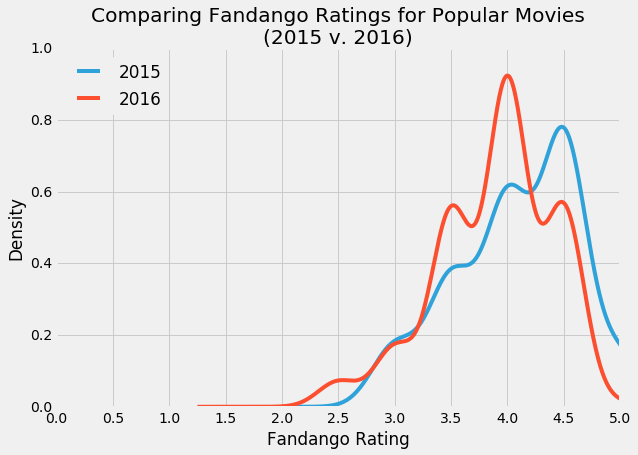

In [16]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(9, 6))
fandango_2016['fandango'].plot.kde(label='2016', legend=True)
plt.title('Comparing Fandango Ratings for Popular Movies\n(2015 v. 2016)')
plt.xlabel('Fandango Rating')
plt.xlim(0, 5)
plt.xticks(arange(0,5.1,.5))
plt.show()

Both graphs are skewed to the left but the 2016 graph looks like is slightly shifted more toward the left. 

The shift to the left shown from the 2016 graph suggests that there is a difference between the ratings for the popular movies in 2015 and the popular movies in 2016. Less movies are given ratings above 4 stars whi more movies given ratings 

In [17]:
#Analyzing frequencies of values using value_counts.
print(' 2015 Ratings','\n','-'*16)
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

 2015 Ratings 
 ----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
print(' 2016 Ratings','\n','-'*16)
fandango_2016['fandango'].value_counts(normalize=True).sort_index()*100

 2016 Ratings 
 ----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The difference between the two graphs is very clear. After analyzing the frequencies of each of the 2 graphs, we found that in 2016 the percentage of popular movies rated 4.5 and 5 stars were significantly less than the movies in 2015. The percentage of 4.5 star movies in 2015 dropped from just under 38% down to just under 25%, and the percentage of 5 star movies dropped from close to 7% all the way down to less than 1%. 

The minimum rating in 2016 is also lower than than that of 2015; 2016 has a minimum rating of 2.5 while 2015 has a minimum rating of 3.0.

Meanwhile, the perentage of 3.5 and 4 star movies in 2015 went up significantly in 2016.

# Determine the Direction of the change

In order to get a more precise picture of the change, we'll compute the mean, median, and the mode of each of the series we've just looked at.

In [19]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

In [20]:
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

In [21]:
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean_2015, median_2015, mode_2015]
summary_stats['2016'] = [mean_2016, median_2016, mode_2016]
summary_stats.index = ['Mean', 'Median', 'Mode']
summary_stats

,2015,2016
Mean,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


The average rating of all the popular movies in 2015 dropped in 2016. The median stayed the same but most of the movies in 2016 were given a rating of 4.0 while most movies in 2015 were given a rating of 4.5. This had to have had a lot to do with the average ratings going down. It was a slight difference I would say; the average went down from 4.08 in 2015 to about 3.89.  

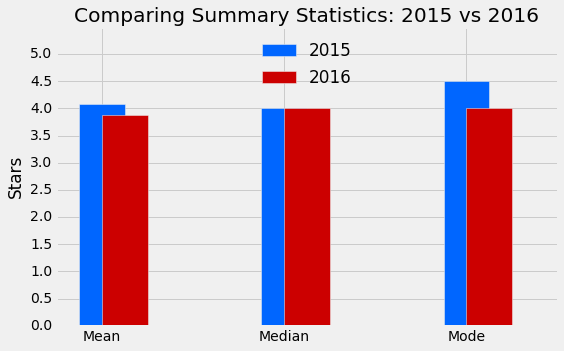

In [22]:
plt.style.use('fivethirtyeight')
summary_stats['2015'].plot.bar(color= '#0066FF', align='center', label='2015', width=0.25)
summary_stats['2016'].plot.bar(color='#CC0000', align='edge', label='2016', width=0.25
                            , rot=0, figsize=(8,5))

plt.style.use('fivethirtyeight')
plt.title('Comparing Summary Statistics: 2015 vs 2016')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

# Conclusion 
The average rating of all the popular movies in 2015 dropped in 2016. The median stayed the same but most of the movies in 2016 were given a rating of 4.0 while most movies in 2015 were given a rating of 4.5. This had to have had a lot to do with the average ratings going down. The numbers do show a slight difference in the ratings as evidence has shown that popular movies released in 2016 had a lower average rating than the popular movies in 2015. It's uncertain what exactly caused the ratings to go down but there's a high chance that it was from Fandango fixing a bug they claimed they had in their rating system.

In [23]:
import bs4
from bs4 import BeautifulSoup as soup
import requests
from requests import get

imdb_url = 'https://www.imdb.com/search/title/?release_date=2018-01-31,2018-12-31&sort=num_votes,desc&page=1'
response = get(imdb_url)
print(response.text)




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
        <title>Released between 2018-01-31 and 2018-12-31
(Sorted by Number of Votes Descending) - IMDb</title>
  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<script>
    if

In [24]:
html_soup = soup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [25]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [26]:
first_movie = movie_containers[0]
first_movie.div

<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt4154756"></div>
</div>

In [27]:
first_movie.h3

<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt4154756/">Avengers: Infinity War</a>
<span class="lister-item-year text-muted unbold">(2018)</span>
</h3>

In [28]:
first_movie.a

<a href="/title/tt4154756/"> <img alt="Avengers: Infinity War" class="loadlate" data-tconst="tt4154756" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMjMxNjY2MDU1OV5BMl5BanBnXkFtZTgwNzY1MTUwNTM@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a>

In [29]:
first_movie.h3.a

<a href="/title/tt4154756/">Avengers: Infinity War</a>

In [30]:
first_movie.h3.a.text

'Avengers: Infinity War'

In [31]:
first_year = first_movie.h3.find('span', class_='lister-item-year text-muted unbold')
                                 

In [32]:
first_year

<span class="lister-item-year text-muted unbold">(2018)</span>

In [33]:
first_year = first_year.text
first_year

'(2018)'

In [34]:
first_movie.strong

<strong>8.4</strong>

In [35]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.4

In [36]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
first_mscore

68

In [37]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="797679" name="nv">797,679</span>

In [38]:
first_votes = int(first_votes['data-value'])
first_votes

797679

In [39]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

In [40]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
# The name
        name = container.h3.a.text
        names.append(name)
# The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
# The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
# The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
# The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [41]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
imdb         47 non-null float64
metascore    47 non-null int64
movie        47 non-null object
votes        47 non-null int64
year         47 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.9+ KB
None


,imdb,metascore,movie,votes,year
0,8.4,68,Avengers: Infinity War,797679,(2018)
1,7.7,66,Deadpool 2,461100,(2018)
2,8.0,49,Bohemian Rhapsody,434036,(2018)
3,7.5,82,A Quiet Place,391874,(2018)
4,7.5,64,Ready Player One,354310,(2018)
5,6.9,55,Aquaman,349749,(2018)
6,6.7,35,Venom,344924,(2018)
7,8.2,69,Green Book,342849,(2018)
8,8.4,87,Spider-Man: Into the Spider-Verse,336727,(2018)
9,7.7,88,A Star Is Born,319061,(2018)


In [42]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2019)]

In [45]:
import time as t
from time import sleep
from random import randint
from warnings import warn("Warning Simulation")
from IPython.core.display import clear_output

start_time = t.time()
requests = 0

for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = t.time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

SyntaxError: invalid syntax (<ipython-input-45-af4f2d576fe1>, line 4)

In [ ]:
# Redeclaring the lists to store data in
headers = {"Accept-Language": "en-US, en;q=0.5"}
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = t.time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = t.time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 76:
            warn('Number of requests was greater than expected.')
            break
        
        # Parse the content of the request with BeautifulSoup
        page_html = soup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:76; Frequency: 0.08132314645571022 requests/s


In [46]:
#combining all our lists into a dataframe
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 5 columns):
imdb         3456 non-null float64
metascore    3456 non-null int64
movie        3456 non-null object
votes        3456 non-null int64
year         3456 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 135.1+ KB
None


,imdb,metascore,movie,votes,year
0,8.5,67,Gladiator,1309197,(2000)
1,8.4,80,Memento,1099989,(2000)
2,8.3,55,Snatch,767046,(2000)
3,8.3,68,Requiem for a Dream,748979,(2000)
4,7.4,64,X-Men,562310,(2000)
5,7.8,73,Cast Away,511192,(2000)
6,7.6,64,American Psycho,473860,(2000)
7,7.3,62,Unbreakable,380315,(2000)
8,6.1,59,Mission: Impossible II,308800,(2000)
9,7.0,73,Meet the Parents,306614,(2000)


In [47]:
#Re-ordering the columns in our dataframe.
movie_ratings = movie_ratings [['movie','year','imdb','metascore','votes']]
movie_ratings.head(10)

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1309197
1,Memento,(2000),8.4,80,1099989
2,Snatch,(2000),8.3,55,767046
3,Requiem for a Dream,(2000),8.3,68,748979
4,X-Men,(2000),7.4,64,562310
5,Cast Away,(2000),7.8,73,511192
6,American Psycho,(2000),7.6,64,473860
7,Unbreakable,(2000),7.3,62,380315
8,Mission: Impossible II,(2000),6.1,59,308800
9,Meet the Parents,(2000),7.0,73,306614


In [50]:
#Converting year column to type int.
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

In [51]:
#Double-checking that conversion to int worked.
movie_ratings['year'].head(3)

0    2000
1    2000
2    2000
Name: year, dtype: int64

In [52]:
#Getting min and max from the 'imdb' and 'metascore' columns.
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [60]:
#Creating new column in the dataset measuring imdb scores on a 100 pt. scale
movie_ratings['n_imdb'] = movie_ratings['imdb']*10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,imdb_100pt_score,imdb_100pt_scale,n_imdb
0,Gladiator,2000,8.5,67,1309197,85.0,85.0,85.0
1,Memento,2000,8.4,80,1099989,84.0,84.0,84.0
2,Snatch,2000,8.3,55,767046,83.0,83.0,83.0


In [61]:
#Saving our dataset to a csv file.
movie_ratings.to_csv('movie_ratings.csv')

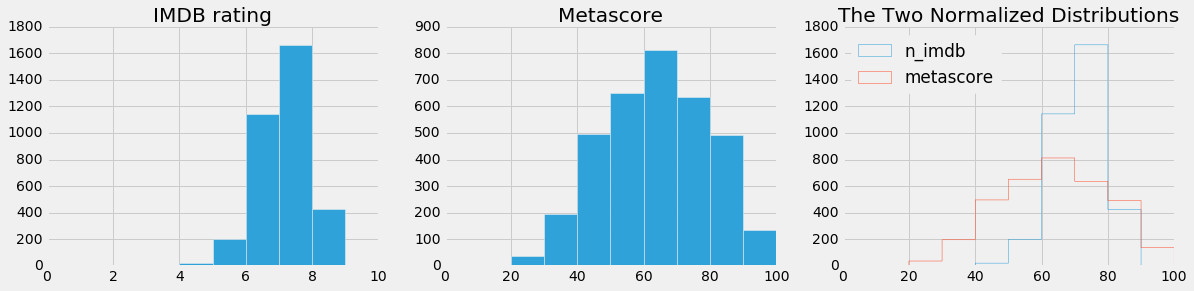

In [63]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (18,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

The 'IMDB rating' graph shows that most movies are rated between 6-8 while fewer movies that are given ratings above 8 and even fewer than that are given ratings below 4. The 'IMDB rating' also shows a heavy left skew. This shows that we most commonly find movies that are rated between 6 and 8 while it's rare to find movies that are given rating above 8 or below 4.
What 

The 'Metascore' graph on the other hand shows a more normal distribution. 

On the comparative graph, 'metascore' shows a more normal distribution than imbd.

What could be the reason for this skew on the 'IMDB rating' graph? It could be that people rate their movies the lowest score if they didn't like the movie or the highest score if they did. It's under speculation why the graph is the way it is and it could be interestingenough to explore further.